# Summarize modality of DEGs 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import fisher_exact

## Load modality analysis

In [2]:
df = pd.read_csv("../../_m/degs_with_modality.txt", sep='\t', index_col=0)
df.head(2)

,Length,gencodeID,ensemblID,gene_type,Symbol,EntrezID,Class,meanExprs,NumTx,gencodeTx,logFC,AveExpr,t,P.Value,adj.P.Val,B,Modality_AA,Modality_EA
ENSG00000154237.12,17600,ENSG00000154237.12,ENSG00000154237,protein_coding,LRRK1,79705.0,InGen,0.276253,11,ENST00000388948.7|ENST00000534045.5|ENST000005...,-1.116997,4.135360,-13.621754,4.660148e-28,9.920990e-24,53.11471,1,1
ENSG00000230076.1,318,ENSG00000230076.1,ENSG00000230076,processed_pseudogene,NaN,NaN,InGen,0.598932,1,ENST00000457497.1,-3.861304,-2.091205,-12.567775,3.081205e-25,3.279788e-21,41.41311,2,1


### Subset and select columns of interest

In [3]:
degs = df[(df['adj.P.Val'] <= 0.05)].loc[:, ['gencodeID', 'Symbol', 'logFC', 't', 
                                             'adj.P.Val', 'Modality_AA', 'Modality_EA']].copy()
degs.head()

,gencodeID,Symbol,logFC,t,adj.P.Val,Modality_AA,Modality_EA
ENSG00000154237.12,ENSG00000154237.12,LRRK1,-1.116997,-13.621754,9.920990e-24,1,1
ENSG00000230076.1,ENSG00000230076.1,NaN,-3.861304,-12.567775,3.279788e-21,2,1
ENSG00000233913.7,ENSG00000233913.7,NaN,-2.272833,-11.622463,7.527018e-19,2,2
ENSG00000226278.1,ENSG00000226278.1,PSPHP1,-4.320438,-11.566503,7.975422e-19,2,2
ENSG00000259583.2,ENSG00000259583.2,NaN,-1.017516,-11.006935,2.009161e-17,1,1


## Summarize modalities

### AA

In [4]:
degs.groupby(['Modality_AA']).size()

Modality_AA
1    2174
2     375
3     117
4      22
5       4
dtype: int64

### EA

In [5]:
degs.groupby(['Modality_EA']).size()

Modality_EA
1    2292
2     326
3      65
4       6
5       3
dtype: int64

## Plot histogram

### AA

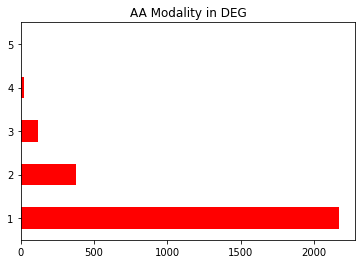

In [6]:
ax = degs['Modality_AA'].value_counts().plot(kind='barh', facecolor='red', title='AA Modality in DEG')
ax.figure.savefig("AA_modality.pdf")
ax.figure.savefig("AA_modality.png")
ax.figure.savefig("AA_modality.svg")

### EA

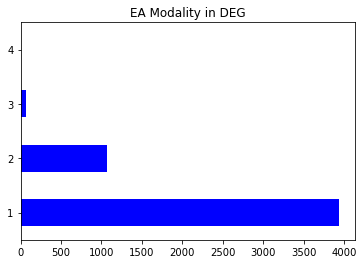

In [8]:
ax = degs['Modality_EA'].value_counts().plot(kind='barh', facecolor='blue', title='EA Modality in DEG')
ax.figure.savefig("EA_modality.pdf")
ax.figure.savefig("EA_modality.png")
ax.figure.savefig("EA_modality.svg")

## Categories of modality

In [7]:
table = [[np.sum((degs['Modality_AA'] == 1) & (degs["Modality_EA"] == 1)), # One vs One (grouping)
          np.sum((degs['Modality_AA'] == 1) & (degs["Modality_EA"] >= 2))], # One AA vs multiple EA
         [np.sum((degs['Modality_AA'] >= 2) & (degs["Modality_EA"] == 1)), # Multiple AA vs One EA
          np.sum((degs['Modality_AA'] >= 2) & (degs["Modality_EA"] >= 2))]] # Multiple vs Multiple
table

[[1888, 286], [404, 114]]

In [8]:
fisher_exact(table)

(1.8627708924738628, 1.2757975909025135e-06)

In [12]:
mod_cat = [];
for index, row in degs.iterrows():
    if row['Modality_AA'] == 1:
        if row['Modality_EA'] == 1:
            mod_cat.append("One_vs_One")
        else:
            mod_cat.append("One_vs_Multi")
    else:
        if row['Modality_EA'] == 1:
            mod_cat.append("Multi_vs_One")
        else:
            mod_cat.append("Multi_vs_Multi")
degs["Modal_Category"] = mod_cat

In [14]:
degs.groupby("Modal_Category").size()

Modal_Category
Multi_vs_Multi     547
Multi_vs_One       784
One_vs_Multi       551
One_vs_One        3221
dtype: int64

In [ ]:
degs["Tissue"] = "Dentate_Gyrus"
degs.to_csv("diffExpr_AAvsEA_annotated_modality.tsv", sep='\t')